# **Drones – A Media vs. Public Sentiment Analysis** 

### **1. Introduction** 
- **Objective**: Analyzing how drones are framed in NYT articles versus how the public perceives them through online discussions.  
- **Approach**: Natural Language Processing (NLP) techniques like sentiment analysis and emotion detection compare media coverage with public sentiment.

In [3]:
#!pip install text2emotion pandas 
#!pip install --upgrade emoji==1.6.3 

In [5]:
from pynytimes import NYTAPI
from nytimes_scraper.nyt_api import NytApi
from nytimes_scraper.comments import fetch_comments_by_article, comments_to_df
from ast import literal_eval
from collections import Counter
import nltk
from nltk.corpus import stopwords
import text2emotion as te
import pandas as pd
import matplotlib.pyplot as plt
import glob
import re

# Configuration settings
plt.style.use('dark_background')
pd.options.display.max_colwidth = 100 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Graduate\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Graduate\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Graduate\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### **2. Fetching Articles**

In [7]:
nyt = NYTAPI("AV2ArvE1gOMoK9dB0jAoGJ0rY9rdrS9k", parse_dates=True)

In [9]:
top_stories = nyt.top_stories()
df = pd.DataFrame.from_dict(top_stories)

In [11]:
most_viewed = nyt.most_viewed(days = 30)
df = pd.DataFrame.from_dict(most_viewed)

In [13]:
# Initialize API with your key
nyt = NYTAPI("RCKjYsVCct7hlziZ7QUeQpNE3Qw7zIZz", parse_dates=True)

# Search for articles related to EVs
drones_articles = nyt.article_search(
    query="drones and drone sightings",
    results=50  # Fetch up to 20 articles
)

# Convert to DataFrame
df_drones = pd.DataFrame(drones_articles)

# Select relevant columns
df_drones_filtered = df_drones[['headline', 'abstract', 'web_url', 'pub_date', 'section_name']]

# Display results
import pandas as pd
pd.options.display.max_colwidth = 200  # Expand column width for better readability
df_drones_filtered.head(20)

csv_file_path = "C:/Users/Graduate/Documents/Advanced Programming/Alldronesarticles.csv"
df_drones_filtered.to_csv(csv_file_path, index=False)

print(f"CSV file saved at: {csv_file_path}")

df_drones_filtered.head(10)

CSV file saved at: C:/Users/Graduate/Documents/Advanced Programming/Alldronesarticles.csv


,headline,abstract,web_url,pub_date,section_name
0,"{'main': 'Hochul Launches Investigation Into Drone Sightings in New York', 'kicker': None, 'content_kicker': None, 'print_headline': None, 'name': None, 'seo': None, 'sub': None}",The governor made the announcement on Friday as sightings spread across New York and New Jersey. State and federal authorities said the flying objects posed no threat to the public.,https://www.nytimes.com/2024/12/13/nyregion/nj-drones-hochul-east-coast.html,2024-12-13 19:15:17+00:00,New York
1,"{'main': 'New F.A.A. Report Tallies Drone Sightings, Highlighting Safety Issues', 'kicker': 'Bits', 'content_kicker': None, 'print_headline': 'As Drone Worries Grow, the F.A.A.Tallies Incidents', ...","The list is not comprehensive, but it still provides a good idea of why the F.A.A. and others are increasingly concerned about the safe operation of drones.",https://bits.blogs.nytimes.com/2014/11/26/new-f-a-a-report-tallies-drone-sightings-highlighting-safety-issues/,2014-11-26 23:57:01+00:00,Technology
2,"{'main': 'Are Those Drones Over New Jersey? Despite Sightings, U.S. Is Skeptical.', 'kicker': None, 'content_kicker': None, 'print_headline': 'After Dozens of Sightings, Drone Mystery Deepens', 'n...",Drones have been reported in at least 10 counties of the state. But a White House spokesman suggested many of them were actually manned aircraft.,https://www.nytimes.com/2024/12/11/nyregion/new-jersey-drones.html,2024-12-11 20:51:37+00:00,New York
3,"{'main': 'Late Night Continues to Drone On About Sightings in the Sky', 'kicker': 'Best of Late Night', 'content_kicker': None, 'print_headline': None, 'name': None, 'seo': None, 'sub': None}","“‘Nothing nefarious, apparently’ doesn’t exactly inspire confidence,” Stephen Colbert said of President Biden’s comments about mysterious drones seen over New Jersey.",https://www.nytimes.com/2024/12/19/arts/television/late-night-drones.html,2024-12-19 08:54:03+00:00,Arts
4,"{'main': 'Drone Disrupts Heathrow, Prompting a Scramble to Improve Security', 'kicker': None, 'content_kicker': None, 'print_headline': 'Heathrow Delays Flights After a Drone Sighting', 'name': No...",The decision to restrict traffic at the busiest airport in Europe came not long after nearby Gatwick was closed for parts of three days because of drone sightings.,https://www.nytimes.com/2019/01/08/world/europe/heathrow-drone-sighting.html,2019-01-08 17:56:12+00:00,World
5,"{'main': 'Weeks of Drone Sightings Leave New Jersey on Edge', 'kicker': None, 'content_kicker': None, 'print_headline': 'Weeks of Drone Sightings Leave New Jerseyans Muttering, and on Edge', 'name...","In the Garden State, where the rash of sightings started a month ago, residents are looking to the skies, wondering why they still don’t have definitive answers from officials.",https://www.nytimes.com/2024/12/14/nyregion/drone-sightings-nj.html,2024-12-15 00:18:10+00:00,New York
6,"{'main': 'No Evidence Drones in Northeast Are a Threat, Officials Say', 'kicker': None, 'content_kicker': None, 'print_headline': None, 'name': None, 'seo': None, 'sub': None}","Numerous sightings of flying objects in recent weeks have raised alarm, but federal law enforcement officials say that at least some were manned aircraft, such as airplanes or helicopters.",https://www.nytimes.com/2024/12/14/us/politics/drones-northeast-new-jersey.html,2024-12-14 22:32:01+00:00,U.S.
7,"{'main': 'U.S. Officials Say Sightings Are Mix of Planes, Stars and Legal Drones', 'kicker': None, 'content_kicker': None, 'print_headline': 'Drone Sightings Are Reported Beyond New Jersey, and a ...","Reports of flying objects continue to occur throughout the Northeast, but the authorities say they do not pose a threat. Here’s what we know.",https://www.nytimes.com/2024/12/13/nyregion/drones-nj-ny-east-coast.html,2024-12-13 23:26:21+00:00,New York
8,"{'main': 'Newark Airport Traffic Is Briefly Halted After Drone Is Spotted', 'kicker': None, 'content_kicker': None, 'print_headline': ' A

### **3. Articles Preprocessing**

In [16]:
# ✅ Initialize NYT API (Replace with your actual API Key)
nyt = NYTAPI("AV2ArvE1gOMoK9dB0jAoGJ0rY9rdrS9k", parse_dates=True)

# ✅ Fetch EV-related articles
drones_articles = nyt.article_search(
    query="drones and drone sightings",
    results=25  # Fetch up to 25 articles
)

# ✅ Convert API response to DataFrame
df_drones = pd.DataFrame(drones_articles)

# ✅ Select relevant columns
df_drones_filtered = df_drones[['headline', 'abstract', 'web_url', 'pub_date', 'section_name']].copy()

# ✅ Extract text safely from 'headline' (handling dictionary format)
df_drones_filtered['headline'] = df_drones_filtered['headline'].apply(lambda x: x.get('main') if isinstance(x, dict) else x)

# ✅ Ensure 'abstract' is a string (some may be NaN or dicts)
df_drones_filtered['abstract'] = df_drones_filtered['abstract'].astype(str)

# ✅ Define a more comprehensive list of stopwords
stop_words = set([
    "the", "is", "and", "or", "to", "for", "in", "on", "of", "a", "an", "with", "by", 
    "this", "that", "are", "very", "said", "more", "from", "at", "it", "was", "be", 
    "which", "as", "will", "its", "also", "about", "but", "new", "one", "would", "two",
    "first", "just", "may", "can", "year", "time", "other", "has", "have", "their", "they",
    "there", "some", "many", "so", "been", "into", "after", "before", "any", "you", "your",
    "several", "general", "models", "seconds", "60", "s", "zero", "rav4", "isnt", "most"
])

# ✅ Function to clean text & extract keywords (removes single-character words)
def extract_keywords(text):
    if not isinstance(text, str):  # Ensure text is a string
        return []
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    words = text.split()  # Tokenize text
    return [word for word in words if word not in stop_words and len(word) > 1]  # Remove stopwords & single characters

# ✅ Apply keyword extraction to headline and abstract
df_drones_filtered['keywords'] = df_drones_filtered['headline'].apply(extract_keywords) + df_drones_filtered['abstract'].apply(extract_keywords)

# ✅ Flatten keyword list & count occurrences
all_keywords = [word for sublist in df_drones_filtered['keywords'] for word in sublist]
keyword_counts = Counter(all_keywords)

# ✅ Convert to DataFrame & filter common keywords
keyword_df = pd.DataFrame(keyword_counts.items(), columns=['Keyword', 'Count']).sort_values(by='Count', ascending=False)
keyword_df = keyword_df[keyword_df['Count'] >= 2]  # Keep only keywords appearing 2+ times

# ✅ Reset index to show ordered 1,2,3... instead of default Pandas index
keyword_df.reset_index(drop=True, inplace=True)
keyword_df.index += 1  # Start index from 1 instead of 0

# ✅ Display top 25 keywords
print(keyword_df.head(25))

# ✅ Save results to a CSV file
csv_filename = "C:/Users/Graduate/Documents/Advanced Programming/filtered_drones_keyword_frequency.csv"
keyword_df.to_csv(csv_filename, index=False)

       Keyword  Count
1        drone     27
2       drones     19
3      airport     15
4    sightings     12
5      gatwick      9
6          not      9
7         over      9
8    officials      8
9       jersey      8
10         why      7
11         faa      6
12          no      6
13     objects      6
14      flying      6
15        were      6
16     flights      6
17         say      5
18       night      5
19       being      5
20          us      5
21       state      4
22      threat      4
23    reported      4
24     spotted      4
25  government      4


### **4. Visualizing Key Words**

CSV file saved: C:/Users/Graduate/Documents/Advanced Programming/filtered_drones_keyword_frequency.csv


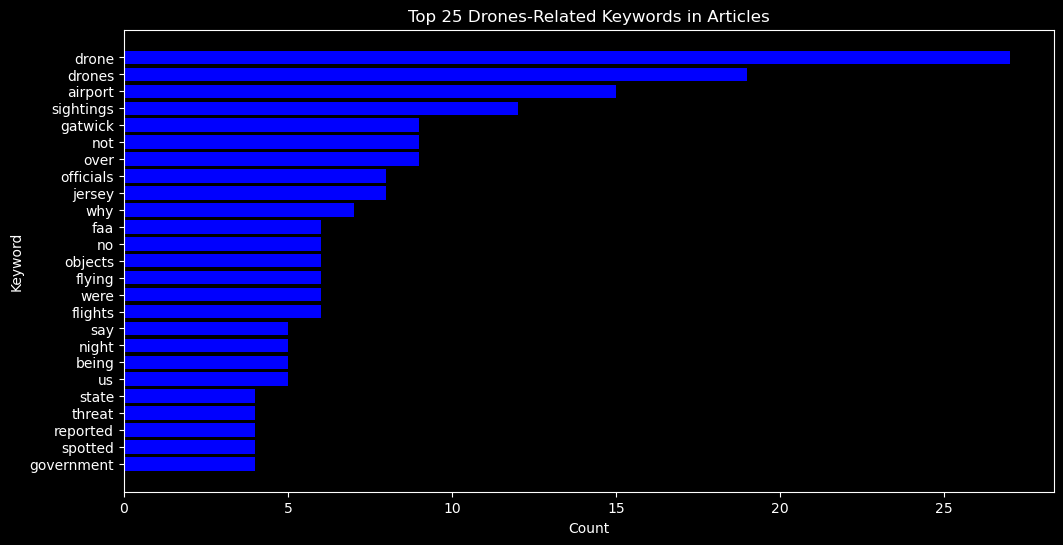

In [19]:
print(f"CSV file saved: {csv_filename}")

# ✅ Plot bar chart of top 25 keywords
top_keywords = keyword_df.head(25)

plt.figure(figsize=(12, 6))
plt.barh(top_keywords['Keyword'], top_keywords['Count'], color='blue')
plt.xlabel("Count")
plt.ylabel("Keyword")
plt.title("Top 25 Drones-Related Keywords in Articles")
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()

#### **Insights:**

The keyword analysis reveals that discussions are centered on **drones, sightings, and security concerns**. Frequent mentions of **airports, sightings, and Gatwick** suggest heightened public anxiety over drone-related disruptions, particularly in restricted airspaces. Terms like **FAA, officials, government, and threat** indicate a strong focus on regulation, legal oversight, and national security. The presence of words such as **why, reported, and say** suggests curiosity, skepticism, or distrust in official narratives. Overall, the public discourse reflects **a mix of fear, regulatory concerns, and ongoing debates about drone safety and government transparency**.

### **5. Fetching and Cleaning Comments**

In [23]:
 
def read_urls_from_csv(file_path):
    """
    Reads a CSV file and extracts cleaned article URLs and titles.

    Parameters:
    file_path (str): Path to the CSV file containing article URLs.

    Returns:
    pd.DataFrame: A DataFrame containing article URLs and cleaned titles.
    """
    df = pd.read_csv(file_path)
    df.columns = df.columns.str.strip()  # Remove spaces in column names

    # Identify correct column names
    url_column = 'web_url' if 'web_url' in df.columns else 'url'
    title_column = 'headline' if 'headline' in df.columns else 'title'

    # Validate existence of necessary columns
    if url_column not in df.columns or title_column not in df.columns:
        raise ValueError("CSV file is missing required columns ('web_url' or 'headline/title')")

    # Extract proper article titles (handling dictionary-like structures)
    df[title_column] = df[title_column].apply(lambda x: x.get('main') if isinstance(x, dict) else x)

    # Select and rename relevant columns
    articles_df = df[[url_column, title_column]].copy()
    articles_df.rename(columns={url_column: 'article_url', title_column: 'article_title'}, inplace=True)

    return articles_df

def process_comment_thread(comment, article_url, article_title, all_comments):
    """
    Recursively process a comment and its replies, adding article metadata to each.

    Parameters:
    comment (dict): The comment to process.
    article_url (str): The URL of the article.
    article_title (str): The title of the article.
    all_comments (list): List to store all processed comments.
    """
    # Add article metadata to the current comment
    comment['article_url'] = article_url
    comment['article_title'] = article_title

    # Store the processed comment
    all_comments.append(comment)

    # Process replies if they exist
    if 'replies' in comment and isinstance(comment['replies'], list):
        for reply in comment['replies']:
            process_comment_thread(reply, article_url, article_title, all_comments)

def fetch_comments_for_urls(api, articles_df):
    """
    Fetch comments for articles and preserve article metadata for all comments and replies.

    Parameters:
    api (NytApi): An instance of the NytApi class.
    articles_df (pd.DataFrame): DataFrame containing article URLs and titles.

    Returns:
    List[dict]: A list of comment dictionaries with article metadata.
    """
    all_comments = []

    for _, article in articles_df.iterrows():
        url = article['article_url']
        title = article['article_title']

        try:
            print(f"Fetching comments for: {title} ({url})")
            comments = fetch_comments_by_article(api, url)

            # Process each top-level comment and its replies
            if comments:
                for comment in comments:
                    process_comment_thread(comment, url, title, all_comments)
            else:
                print(f"No comments found for: {title}")

        except Exception as e:
            print(f"Error fetching comments for {url}: {e}")

    return all_comments

def save_comments_to_csv(comments, output_file):
    """
    Save comments with article metadata to a CSV file.

    Parameters:
    comments (List[dict]): A list of comment dictionaries with article metadata.
    output_file (str): Path to the output CSV file.
    """
    if comments:
        # Convert the comments to a DataFrame
        comment_df = pd.DataFrame(comments)

        # Ensure article metadata columns are first
        metadata_cols = ['article_url', 'article_title']
        other_cols = [col for col in comment_df.columns if col not in metadata_cols]
        comment_df = comment_df[metadata_cols + other_cols]

        # Save the DataFrame to a CSV file
        comment_df.to_csv(output_file, index=False)
        print(f"✅ Comments saved to {output_file}")

        # Print summary statistics
        print(f"\n📊 Summary:")
        print(f"🔹 Total comments collected: {len(comment_df)}")
        print(f"🔹 Articles with comments: {comment_df['article_url'].nunique()}")
        print(f"🔹 Top-level comments: {len(comment_df[comment_df['parentID'].isna()])}")
        print(f"🔹 Replies: {len(comment_df[comment_df['parentID'].notna()])}")

        # Check for missing metadata
        missing_metadata = comment_df[comment_df['article_url'].isna() | comment_df['article_title'].isna()]
        if not missing_metadata.empty:
            print(f"⚠️ Warning: {len(missing_metadata)} comments are missing article metadata")
    else:
        print("❌ No comments found!")

def main(input_csv, output_csv, api_key):
    """
    Main function to orchestrate the comment collection process.

    Parameters:
    input_csv (str): Path to the input CSV file containing article URLs.
    output_csv (str): Path to the output CSV file to save comments.
    api_key (str): NYTimes API key.
    """
    api = NytApi(api_key)

    # Read and clean article data
    articles_df = read_urls_from_csv(input_csv)
    print(f"✅ Loaded {len(articles_df)} articles from {input_csv}")

    # Fetch comments
    comments = fetch_comments_for_urls(api, articles_df)

    # Save to CSV
    save_comments_to_csv(comments, output_csv)

# Example usage
if __name__ == "__main__":
    input_csv = "C:/Users/Graduate/Documents/Advanced Programming/Alldronesarticles.csv"  # Update with actual path
    output_csv = "C:/Users/Graduate/Documents/Advanced Programming/Alldrones_comments.csv"
    api_key = "AV2ArvE1gOMoK9dB0jAoGJ0rY9rdrS9k"  # Replace with your actual API key

    main(input_csv, output_csv, api_key) 

✅ Loaded 50 articles from C:/Users/Graduate/Documents/Advanced Programming/Alldronesarticles.csv
Fetching comments for: {'main': 'Hochul Launches Investigation Into Drone Sightings in New York', 'kicker': None, 'content_kicker': None, 'print_headline': None, 'name': None, 'seo': None, 'sub': None} (https://www.nytimes.com/2024/12/13/nyregion/nj-drones-hochul-east-coast.html)
No comments found for: {'main': 'Hochul Launches Investigation Into Drone Sightings in New York', 'kicker': None, 'content_kicker': None, 'print_headline': None, 'name': None, 'seo': None, 'sub': None}
Fetching comments for: {'main': 'New F.A.A. Report Tallies Drone Sightings, Highlighting Safety Issues', 'kicker': 'Bits', 'content_kicker': None, 'print_headline': 'As Drone Worries Grow, the F.A.A.Tallies Incidents', 'name': None, 'seo': None, 'sub': None} (https://bits.blogs.nytimes.com/2014/11/26/new-f-a-a-report-tallies-drone-sightings-highlighting-safety-issues/)
Fetching comments for: {'main': 'Are Those Drone

### **6. A 6018 Total Comments extracted from 22 Unique Articles** 

In [26]:
def count_comments_and_articles(file_path):
    """
    Reads a CSV file containing comments and calculates:
    - Total number of comments
    - Number of unique articles with comments
    
    Parameters:
    file_path (str): Path to the CSV file containing comments.
    
    Returns:
    None: Prints the counts.
    """
    # Load the comments dataset
    df = pd.read_csv(file_path)
    
    # Check if necessary columns exist
    if 'article_url' not in df.columns or 'commentBody' not in df.columns:
        raise ValueError("CSV file must contain 'article_url' and 'commentBody' columns.")
    
    # Count total comments
    total_comments = df['commentBody'].notna().sum()
    
    # Count unique articles with comments
    unique_articles = df['article_url'].nunique()
    
    # Print results
    print(f"📊 Total Comments: {total_comments}")
    print(f"📌 Unique Articles with Comments: {unique_articles}")

# Example usage
file_path = "C:/Users/Graduate/Documents/Advanced Programming/Alldrones_comments.csv"  # Update with your actual path
count_comments_and_articles(file_path)


📊 Total Comments: 6018
📌 Unique Articles with Comments: 22


### **7. Comments Processing** 

In [29]:
# Load dataset
file_path = "C:/Users/Graduate/Documents/Advanced Programming/Alldrones_comments.csv"   
df = pd.read_csv(file_path)

# Function to clean text
def clean_text(text):
    if not isinstance(text, str):  # Ensure text is a string
        return ""
    
    text = re.sub(r'<br/>', ' ', text)  # Remove HTML line breaks
    text = re.sub(r'http\S+|www.\S+', '', text)  # Remove URLs
    text = re.sub(r'\s+', ' ', text).strip()  # Normalize whitespace
    return text

# Apply text cleaning
df['cleaned_comment'] = df['commentBody'].astype(str).apply(clean_text)

# Check cleaned data
display(df[['commentBody', 'cleaned_comment']].head()) 

,commentBody,cleaned_comment
0,"These concerns, and almost all press these days about personal drones, are near-term and near-sighted. The technology is racing ahead. Drones will become increasingly miniaturized and capable. As ...","These concerns, and almost all press these days about personal drones, are near-term and near-sighted. The technology is racing ahead. Drones will become increasingly miniaturized and capable. As ..."
1,"In Europe, regulations for drones have existed for a few years already. In addition, drone owners must pass an exam after taking lessons about airspace regulations and restrictions. Certified pilo...","In Europe, regulations for drones have existed for a few years already. In addition, drone owners must pass an exam after taking lessons about airspace regulations and restrictions. Certified pilo..."
2,"This is just the beginning. Wait until they shrink in size, down to the size of a quarter, then down to the size of a fly. Advancing trends in technology will make this a reality before too l...","This is just the beginning. Wait until they shrink in size, down to the size of a quarter, then down to the size of a fly. Advancing trends in technology will make this a reality before too long. ..."
3,"Mr. Wingfield- your classification as ""mis-behavior"" is problematic. Also- you should clarify that not all of these are multi-rotors. 11/9, 10/26, 10/25 - those are RC planes. 11/8- UAS had ope...","Mr. Wingfield- your classification as ""mis-behavior"" is problematic. Also- you should clarify that not all of these are multi-rotors. 11/9, 10/26, 10/25 - those are RC planes. 11/8- UAS had operat..."
4,"Also put into context in 2012 there were 10,726 incidents of wildlife actually striking planes. With no UAS strikes to date, this is degrading to almost comic levels of ""could"" happens.","Also put into context in 2012 there were 10,726 incidents of wildlife actually striking planes. With no UAS strikes to date, this is degrading to almost comic levels of ""could"" happens."


### **8. Emotion Analysis**

#### **a. On Comments**

In [ ]:
# Load dataset
file_path = "C:/Users/Graduate/Documents/Advanced Programming/Alldrones_comments.csv"   
df = pd.read_csv(file_path)

# Function to clean text
def clean_text(text):
    if not isinstance(text, str):  # Ensure text is a string
        return ""
    
    text = re.sub(r'<br/>', ' ', text)  # Remove HTML line breaks
    text = re.sub(r'http\S+|www.\S+', '', text)  # Remove URLs
    text = re.sub(r'\s+', ' ', text).strip()  # Normalize whitespace
    return text

# Apply text cleaning
df['cleaned_comment'] = df['commentBody'].astype(str).apply(clean_text)

# Apply emotion analysis
df['emotions'] = df['cleaned_comment'].apply(lambda x: te.get_emotion(x) if isinstance(x, str) else {})

# Show results
display(df[['cleaned_comment', 'emotions']].head()) 

In [ ]:
# Convert emotion dictionary into separate columns
emotion_df = df['emotions'].apply(pd.Series)

# Sum up the total occurrences of each emotion
emotion_sums = emotion_df.sum()

# Set the style to default (white background)
plt.style.use("default")

# Create the bar chart
plt.figure(figsize=(8, 5))
emotion_sums.plot(kind='bar', color=['blue', 'red', 'orange', 'purple', 'green'], zorder=3)

# Customize the visualization
plt.title("Emotion Analysis Summary of Comments")
plt.xlabel("Emotions")
plt.ylabel("Total Score")
plt.xticks(rotation=45)

# Ensure grid lines are behind the bars
plt.grid(axis='y', linestyle='--', alpha=0.7, zorder=0)

# Show the plot
plt.show() 

#### **Insights**

The emotion analysis of public comments reveals **fear as the dominant sentiment**, suggesting widespread concern over drone-related issues such as **surveillance, security risks, and regulatory uncertainty**. High levels of **sadness and surprise** indicate emotional reactions to specific incidents, likely involving drone sightings, military applications, or privacy concerns. **Happiness and anger appear less frequently**, implying that while some see drones as beneficial, the broader conversation is driven by **uncertainty and anxiety**. This highlights the gap between **technological advancements and public trust**, emphasizing the need for clearer communication and regulation.

#### **b. On Articles**

In [ ]:
# Load the dataset containing articles
articles_file_path = "C:/Users/Graduate/Documents/Advanced Programming/Alldronesarticles.csv"
df_articles = pd.read_csv(articles_file_path)

# Function to clean article text
def clean_text(text):
    if not isinstance(text, str):  # Ensure text is a string
        return ""
    
    text = re.sub(r'<br/>', ' ', text)  # Remove HTML line breaks
    text = re.sub(r'http\S+|www.\S+', '', text)  # Remove URLs
    text = re.sub(r'\s+', ' ', text).strip()  # Normalize whitespace
    return text

# Apply text cleaning to the article content
df_articles['cleaned_article'] = df_articles['abstract'].astype(str).apply(clean_text)

# Apply emotion analysis
df_articles['emotions'] = df_articles['cleaned_article'].apply(lambda x: te.get_emotion(x) if isinstance(x, str) else {})

# Convert emotion dictionaries into separate columns
emotion_df = df_articles['emotions'].apply(pd.Series)

# Sum up the total occurrences of each emotion
emotion_sums = emotion_df.sum()

# Plot the emotion distribution
plt.figure(figsize=(8, 5))
emotion_sums.plot(kind='bar', color=['blue', 'red', 'orange', 'purple', 'green'])

# Customize the visualization
plt.title("Emotion Analysis Summary of Articles")
plt.xlabel("Emotions")
plt.ylabel("Total Score")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

# Display the first few rows with emotions for validation
display(df_articles[['cleaned_article', 'emotions']].head())


#### **Insights**

The **emotion analysis of NYT articles** shows that **fear is the dominant sentiment**, reflecting media coverage that emphasizes security risks, government actions, and potential threats associated with drones. **Sadness and surprise appear frequently**, indicating coverage of unsettling or unexpected developments, such as drone sightings or policy changes. **Happiness and anger are minimal**, suggesting that news articles maintain a neutral tone with limited emotional language. Compared to public comments, **media framing leans more factual**, yet still highlights risks, shaping public perception by reinforcing concerns over drones' implications.

### **Conclusion**

The analysis highlights a clear **disparity between media coverage and public sentiment** regarding drones. While **news articles maintain a factual tone**, they still emphasize risks, reinforcing public concerns. **Fear dominates both media and public discourse**, driven by issues of **security, surveillance, and government regulation**. However, **public comments show stronger emotional reactions**, with heightened **sadness and surprise**, likely influenced by personal beliefs, speculation, and real-world incidents. This divergence underscores how **media framing shapes narratives**, while public discourse reflects **unfiltered concerns and uncertainties**. Addressing these concerns through **transparent policies and clearer communication** could help bridge the gap between technological progress and public trust.